In [2]:
# ----- DEEP LEARNING ---------

In [3]:
with open('common.py') as fin:
  msg = fin.read()
  exec(msg)

In [4]:
with open('matplotlibconf.py') as fin:
   exec(fin.read())

In [5]:
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))
def step(x):
    return x > 0

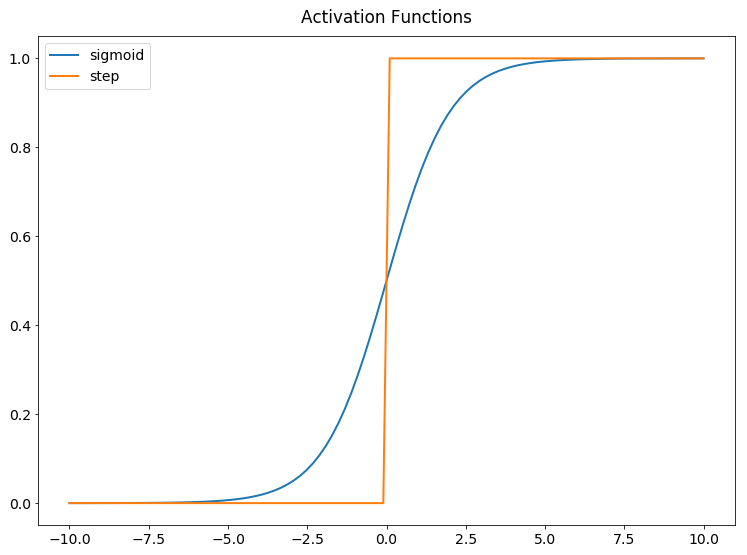

In [6]:
# -- Activation Function with Sigmoid and Step function --
x = np.linspace(-10, 10, 100)
plt.plot(x, sigmoid(x))
plt.plot(x, step(x))
plt.legend(['sigmoid', 'step'])
plt.title('Activation Functions');

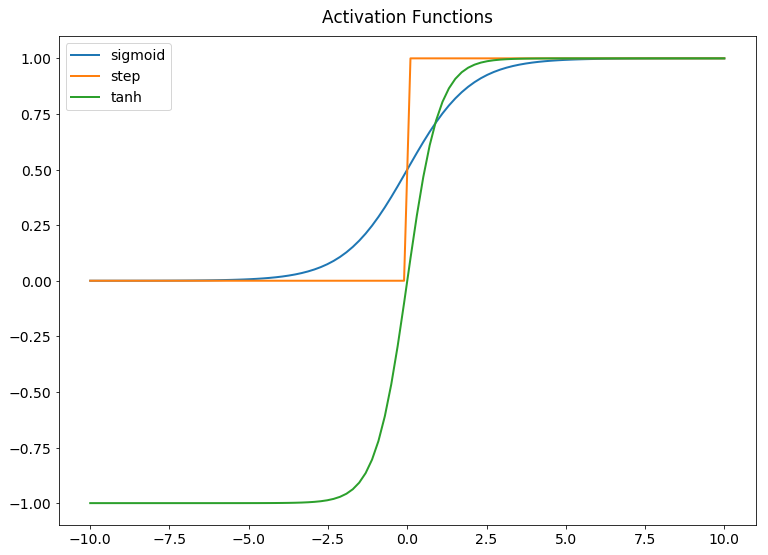

In [7]:
# -- [Activation Function] Sigmoid, Step, and Tanh funstions --
x = np.linspace(-10, 10, 100)
plt.plot(x, sigmoid(x))
plt.plot(x, step(x))
plt.plot(x, np.tanh(x))
plt.legend(['sigmoid', 'step', 'tanh'])
plt.title('Activation Functions');

In [8]:
# -- [Activation Function] The rectified linear unit function or simply rectifier --
def relu(x):
    cond = x > 0
    return cond * x

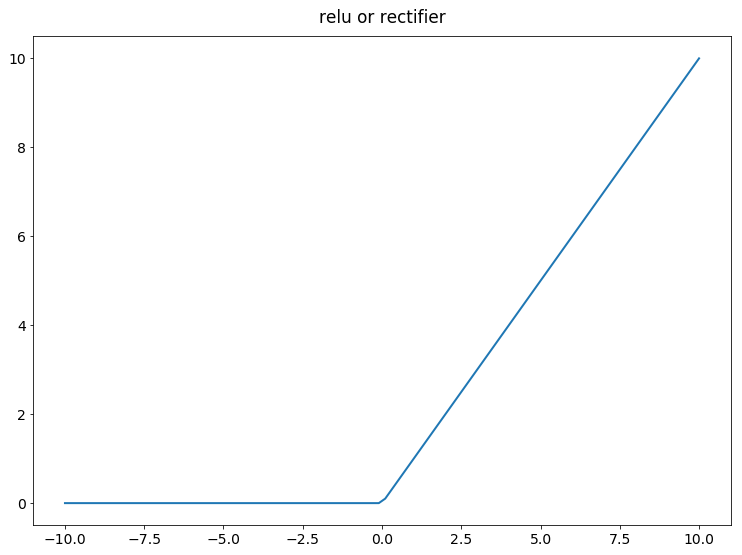

In [9]:
x = np.linspace(-10, 10, 100)
plt.plot(x, relu(x))
plt.title('relu or rectifier');

In [10]:
# -- [Activation Function] The Softplus function (rarely used) --
def softplus(x):
    return np.log1p(np.exp(x))

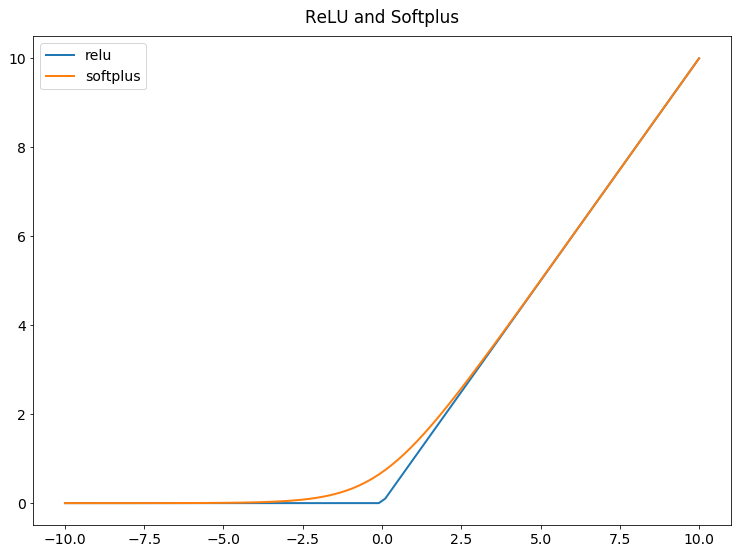

In [11]:
x = np.linspace(-10, 10, 100)
plt.plot(x, relu(x))
plt.plot(x, softplus(x))
plt.legend(['relu', 'softplus'])
plt.title('ReLU and Softplus');

In [12]:
# -- [Activation Function] SeLU (Scaled exponential linear unit ) --
def selu(x):
    alpha = 1.6732632423543772848170429916717
    scale = 1.0507009873554804934193349852946
    res = scale * np.where(x>0.0,
                x,
                alpha * (np.exp(x) - 1))
    return res

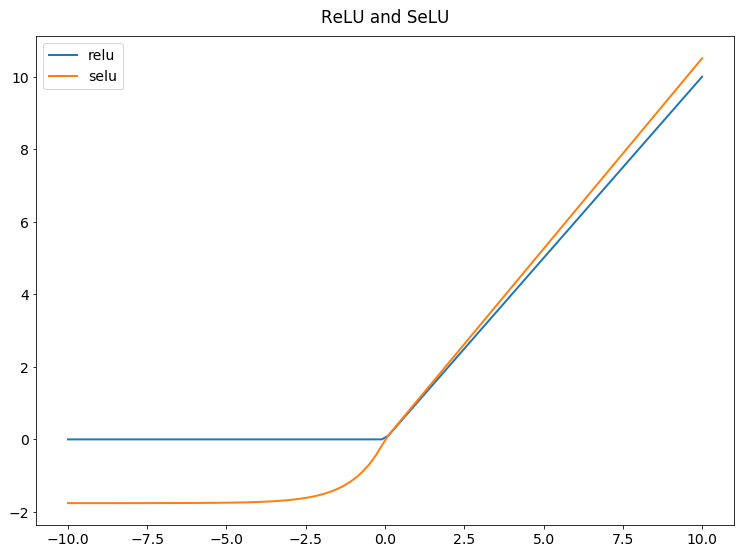

In [13]:
x = np.linspace(-10, 10, 100)
plt.plot(x, relu(x))
plt.plot(x, selu(x))
plt.legend(['relu', 'selu'])
plt.title('ReLU and SeLU');

In [14]:
# ----- Binary Classification ------
# ----- Using Scikit Learn  make_moons function
from sklearn.datasets import make_moons

In [15]:
X, y = make_moons(n_samples=2000,
                    noise=0.1,
                    random_state=0)

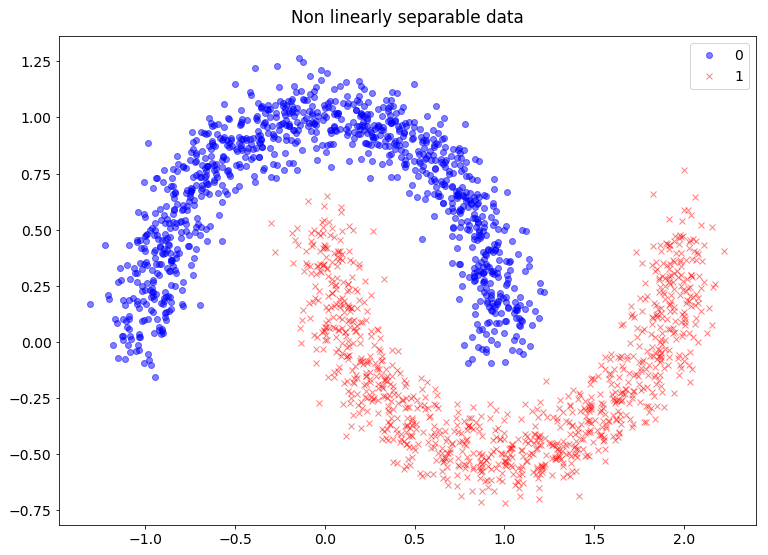

In [16]:
plt.plot(X[y==0, 0], X[y==0, 1], 'ob', alpha=0.5)
plt.plot(X[y==1, 0], X[y==1, 1], 'xr', alpha=0.5)
plt.legend(['0', '1'])
plt.title('Non linearly separable data');

In [17]:
X.shape

(2000, 2)

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
# -- Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [20]:
X_train.shape

(1400, 2)

In [21]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam
from time import time

tf.compat.v1.disable_eager_execution()

In [22]:
#with tf.device('cpu:0'):
#  model = Sequential()
model = Sequential()

In [23]:
model.add(Dense(1, input_dim=2, activation='sigmoid'))

In [24]:
model.compile(Adam(lr=0.05), 'binary_crossentropy', metrics=['accuracy'])

In [25]:
print("Training convolutional model:  w/out GPU ...")
t0 = time()

model.fit(X_train, y_train, batch_size=1024, epochs=100, verbose=1)

print("{:0.3f} seconds.".format(time() - t0))

Training convolutional model:  w/out GPU ...
Epoch 1/100
1400/1400 [==============================] - 0s 135us/sample - loss: 1.3350 - accuracy: 0.1664
Epoch 2/100
1400/1400 [==============================] - 0s 4us/sample - loss: 1.2613 - accuracy: 0.1650
Epoch 3/100
1400/1400 [==============================] - 0s 4us/sample - loss: 1.1913 - accuracy: 0.1629
Epoch 4/100
1400/1400 [==============================] - 0s 4us/sample - loss: 1.1235 - accuracy: 0.1600
Epoch 5/100
1400/1400 [==============================] - 0s 5us/sample - loss: 1.0577 - accuracy: 0.1564
Epoch 6/100
1400/1400 [==============================] - 0s 4us/sample - loss: 0.9959 - accuracy: 0.1500
Epoch 7/100
1400/1400 [==============================] - 0s 4us/sample - loss: 0.9372 - accuracy: 0.1407
Epoch 8/100
1400/1400 [==============================] - 0s 4us/sample - loss: 0.8824 - accuracy: 0.1314
Epoch 9/100
1400/1400 [==============================] - 0s 4us/sample - loss: 0.8310 - accuracy: 0.1307
Epoch 10

In [26]:
results = model.evaluate(X_test, y_test)

600/600 [==============================] - 0s 160us/sample - loss: 0.2641 - accuracy: 0.8783


In [27]:
print("The Accuracy score on the Test set is:\t", "{:0.3f}".format(results[1]))

The Accuracy score on the Test set is:	 0.878


In [28]:
def plot_decision_boundary(model, X, y):
    amin, bmin = X.min(axis=0) - 0.1
    amax, bmax = X.max(axis=0) + 0.1
    hticks = np.linspace(amin, amax, 101)
    vticks = np.linspace(bmin, bmax, 101)
    
    aa, bb = np.meshgrid(hticks, vticks)
    ab = np.c_[aa.ravel(), bb.ravel()]
    
    c = model.predict(ab)
    cc = c.reshape(aa.shape)
    
    plt.figure(figsize=(12, 8))
    plt.contourf(aa, bb, cc, cmap='bwr', alpha=0.2)
    plt.plot(X[y==0, 0], X[y==0, 1], 'ob', alpha=0.5)
    plt.plot(X[y==1, 0], X[y==1, 1], 'xr', alpha=0.5)
    plt.legend(['0', '1'])
    

Plot decision boundary model: w/out GPU ...
0.205 seconds.


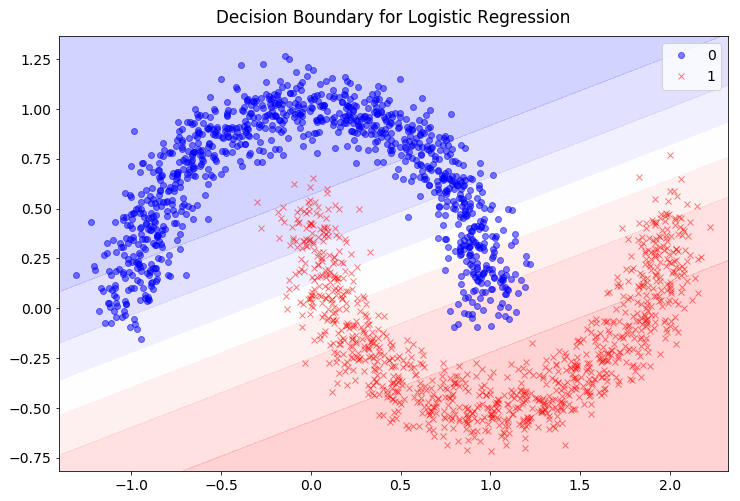

In [29]:
print("Plot decision boundary model: w/out GPU ...")
t0 = time()

plot_decision_boundary(model, X, y)
plt.title("Decision Boundary for Logistic Regression")
print("{:0.3f} seconds.".format(time() - t0))

In [30]:
# --- Deep model with 3 lyers ( 1st. layer with 4 nodes, 2 inputs, and a relu activation function )
model = Sequential()
model.add(Dense(4, input_dim=2, activation='relu'))

In [31]:
model.add(Dense(2, activation='relu'))

In [32]:
model.add(Dense(1, activation='sigmoid'))

In [33]:
model.compile(Adam(lr=0.05), 'binary_crossentropy', metrics=['accuracy'])

In [34]:
print("Training convolutional model: w/out  GPU ...")
t0 = time()
model.fit(X_train, y_train, epochs=100, verbose=0)
print("{:0.3f} seconds.".format(time() - t0))

Training convolutional model: w/out  GPU ...
7.488 seconds.


In [35]:
# -- predict classes
y_train_pred = model.predict_classes(X_train)
y_test_pred = model.predict_classes(X_test)

In [36]:
# -- predict probability of each class
y_train_prob = model.predict(X_train)
y_test_prob = model.predict(X_test)

In [37]:
y_train_pred[:3]

array([[1],
       [0],
       [0]])

In [38]:
y_train_prob[:3]

array([[0.99940836],
       [0.        ],
       [0.        ]], dtype=float32)

In [39]:
# -- Compare predicted classes with actual classes
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [40]:
acc = accuracy_score(y_train, y_train_pred)
print("Accuracy (Train set):\t{:0.3f}".format(acc))
acc = accuracy_score(y_test, y_test_pred)
print("Accuracy (Test set):\t{:0.3f}".format(acc))

Accuracy (Train set):	0.999
Accuracy (Test set):	0.997


Plot decision boundary for Fully Connected model: w/out GPU ...
0.193 seconds.


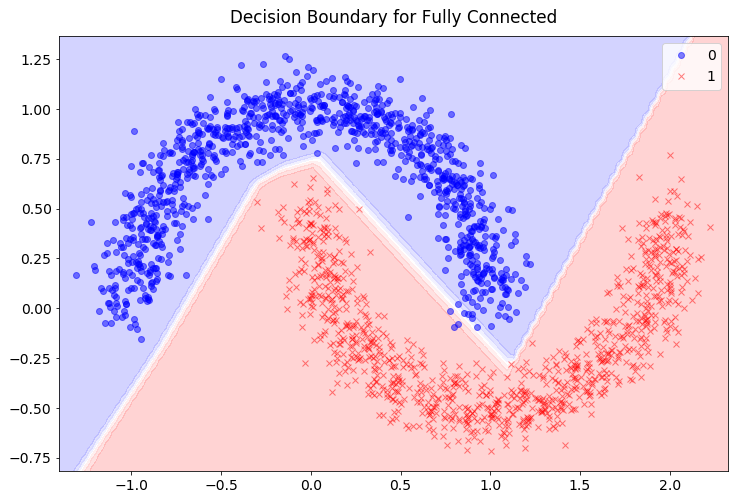

In [41]:
print("Plot decision boundary for Fully Connected model: w/out GPU ...")
t0 = time()

plot_decision_boundary(model, X, y)
plt.title("Decision Boundary for Fully Connected")
print("{:0.3f} seconds.".format(time() - t0))

In [42]:
# -- Using tanh Activation function
model = Sequential()
model.add(Dense(4, input_dim=2, activation='tanh'))
model.add(Dense(2, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))
model.compile(Adam(lr=0.05), loss='binary_crossentropy', metrics=['accuracy'])

In [43]:
model.fit(X_train, y_train, batch_size=1024, epochs=100, verbose=0)

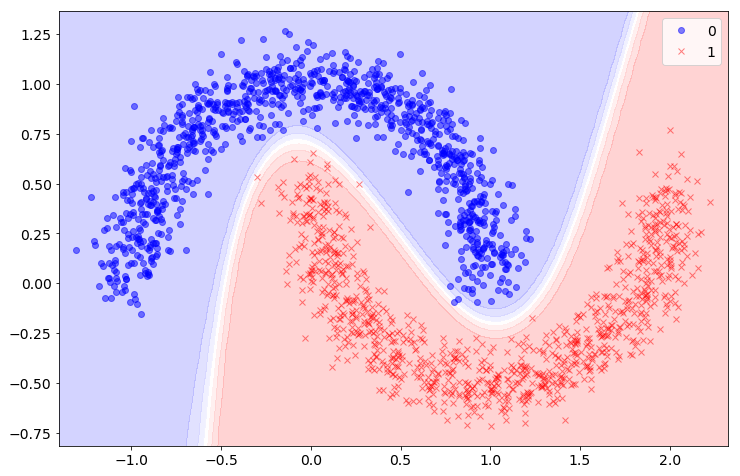

In [44]:
plot_decision_boundary(model, X, y)

In [45]:
y_train_pred = model.predict_classes(X_train)
y_test_pred = model.predict_classes(X_test)

In [46]:
acc = accuracy_score(y_train, y_train_pred)
print("Accuracy (Train set):\t{:0.3f}".format(acc))
acc = accuracy_score(y_test, y_test_pred)
print("Accuracy (Test set):\t{:0.3f}".format(acc))

Accuracy (Train set):	1.000
Accuracy (Test set):	0.998


In [48]:
# ---------------- Multiclass classication --------------------------
# -- Mutually exclusive classes and Softmax
df = pd.read_csv('./data/iris.csv')


In [49]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [83]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
...,...,...,...,...,...
144,6.7,3.3,5.7,2.5,virginica
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica


In [50]:
X = df.drop('species', axis=1)
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [51]:
targets = df['species'].unique()
targets

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [52]:
target_dict = {n:i for i, n in enumerate(targets)}
target_dict

{'setosa': 0, 'versicolor': 1, 'virginica': 2}

In [54]:
y= df['species'].map(target_dict)
y.head()

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int64

In [55]:
y.shape

(150,)

In [56]:
from tensorflow.keras.utils import to_categorical

In [57]:
y_cat = to_categorical(y)

In [58]:
y_cat.shape

(150, 3)

In [62]:
y_cat[:5]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y_cat, test_size=0.2, random_state=0, stratify=y)

In [67]:
model = Sequential()
model.add(Dense(3, input_dim=4, activation='softmax'))
model.compile(Adam(lr=0.1), loss='categorical_crossentropy', metrics=['accuracy'])

In [68]:
model.fit(X_train, y_train, validation_split=0.1, epochs=30, verbose=0)

In [69]:
y_pred = model.predict(X_test)
y_pred

array([[9.88123000e-01, 1.18743358e-02, 2.70531564e-06],
       [9.36131366e-03, 6.47098780e-01, 3.43539923e-01],
       [9.71388280e-01, 2.85926014e-02, 1.90625724e-05],
       [3.57957440e-04, 2.68555492e-01, 7.31086493e-01],
       [9.79452848e-01, 2.05386430e-02, 8.50141078e-06],
       [9.19904001e-03, 6.49430752e-01, 3.41370195e-01],
       [3.66139895e-04, 1.89515308e-01, 8.10118616e-01],
       [9.74400699e-01, 2.55827866e-02, 1.64503181e-05],
       [9.64132369e-01, 3.58379222e-02, 2.98199484e-05],
       [3.87859717e-02, 8.19239020e-01, 1.41974971e-01],
       [6.51805167e-05, 6.85986951e-02, 9.31336164e-01],
       [3.10566146e-02, 7.65977383e-01, 2.02966005e-01],
       [5.46999089e-03, 5.93377292e-01, 4.01152700e-01],
       [2.36542139e-04, 1.66626275e-01, 8.33137155e-01],
       [3.46083418e-02, 8.36497009e-01, 1.28894702e-01],
       [2.04062380e-04, 1.34624958e-01, 8.65171015e-01],
       [9.06109199e-05, 8.60251039e-02, 9.13884282e-01],
       [2.11768523e-02, 7.91672

In [71]:
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

In [72]:
y_test_class

array([0, 1, 0, 2, 0, 1, 2, 0, 0, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 0, 0, 2,
       2, 2, 0, 1, 1, 2, 0, 0], dtype=int64)

In [73]:
y_pred_class

array([0, 1, 0, 2, 0, 1, 2, 0, 0, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 0, 0, 2,
       2, 2, 0, 1, 1, 2, 0, 0], dtype=int64)

In [74]:
from sklearn.metrics import classification_report

In [75]:
print(classification_report(y_test_class, y_pred_class))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

   micro avg       1.00      1.00      1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [76]:
cm = confusion_matrix(y_test_class, y_pred_class)

In [77]:
pd.DataFrame(cm, index = targets, columns = ['pred_'+c for c in targets])

,pred_setosa,pred_versicolor,pred_virginica
setosa,10,0,0
versicolor,0,10,0
virginica,0,0,10


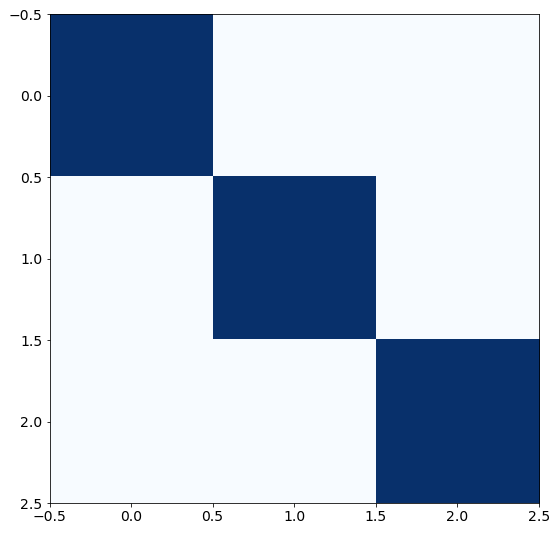

In [78]:
plt.imshow(cm, cmap='Blues');

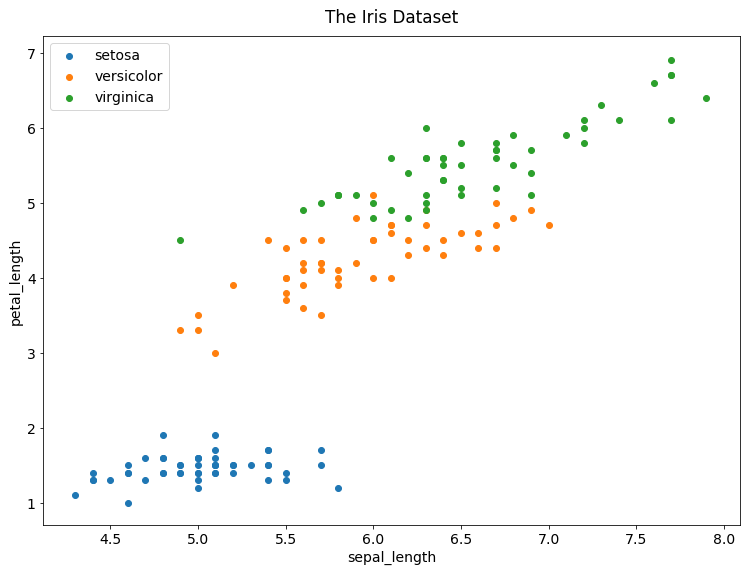

In [80]:
plt.scatter(X.loc[y==0,'sepal_length'], X.loc[y==0,'petal_length'])
plt.scatter(X.loc[y==1,'sepal_length'], X.loc[y==1,'petal_length'])
plt.scatter(X.loc[y==2,'sepal_length'], X.loc[y==2,'petal_length'])
plt.xlabel('sepal_length')
plt.ylabel('petal_length')
plt.legend(targets)
plt.title("The Iris Dataset");

In [81]:
import seaborn as sns

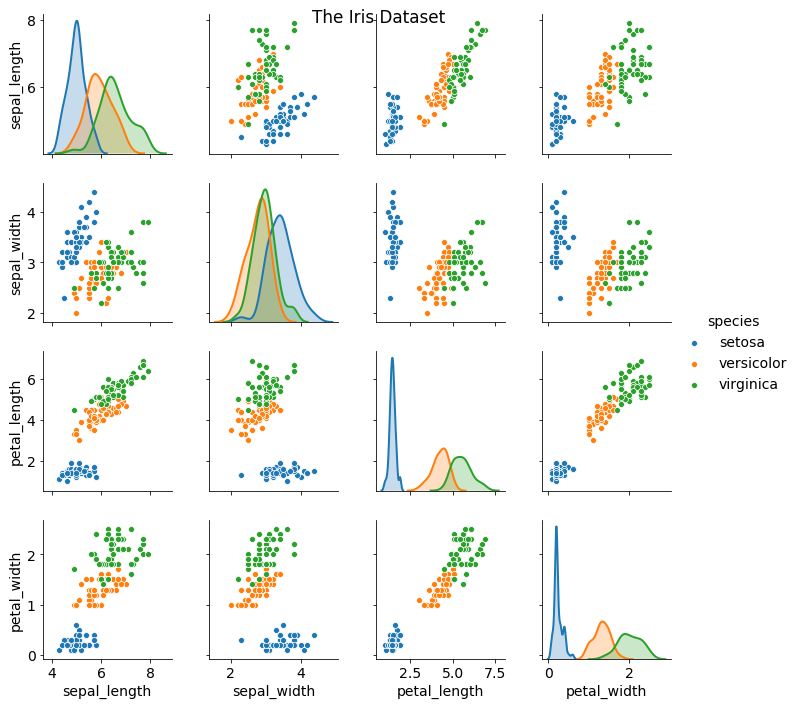

In [82]:
g = sns.pairplot(df, hue="species")
g.fig.suptitle("The Iris Dataset");